In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas

# all units SI (meters, kg, etc.)
global distance
distance = 7
global height
height = 2.286
global m
m = 0.141748
global R_l
R_l = 0.0508
global R_u
R_u = 0.03175
global R_b
R_b = 0.0889
global A
A = 0.0248286665
global interval
interval = 0.005
global run
run = True

#not sure if global matters here

In [57]:
def iterate():
    global run
    for w_r in range(30,600): #6380 rpm in rps
        for theta in range(15,75):
            if(run):
                trajectory(w_r, theta*math.pi/180)
    #print("done")
    run = True


In [58]:
def trajectory(w, theta):
    v = (w*R_l + 9/16*w*R_u)/2
    #print(v)
    s = (w*R_l - 9/16*w*R_u)/(2*math.pi*R_b)
    runPath(w,v,s,theta)

In [59]:

def runPath(w,v_i,s,theta_i):
    #print("path")
    
    v_x = v_i*math.cos(theta_i)
    v_y = v_i*math.sin(theta_i)
    theta = theta_i
    x_dist = 0
    y_dist = 0
    through = True
    x = [0]
    y = [0]
    while(through):
        x_dist += v_x*interval
        y_dist += v_y*interval
        x.append(x_dist)
        y.append(y_dist)
        v_n = math.sqrt(v_x*v_x + v_y*v_y)
        theta = angle(v_x,v_y)
        #if(theta > 0):
            #print("theta " + str(theta))
                  
        magnus = magnusF(s, v_n)
        drag = dragF(v_n)
        #if(magnus*math.sin(theta) < 0):
            #print(magnus*math.sin(theta))
        v_x -= (magnus*math.sin(theta) + drag*math.cos(theta))*interval
        f_y = (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))
        if(f_y < 0):
            through = False
            break
        #v_y -= (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))*interval
        v_y -= f_y*interval
        if(((x_dist > distance - .01) and (x_dist < distance + .01)) and ((y_dist > height - .01) and (y_dist < height + .01))):
            #print("in")
            through = False
            global w_min
            #print(w*60/(2*math.pi))
            #print(theta_i*180/math.pi)
            plt.plot(x,y)
            print ("w: " + str(w*60/(2*math.pi)) + " a: " + str(theta_i*180/math.pi))
            global run
            run = False
            break
        if(y_dist < 0 or y_dist > 3.2):
            through = False
            break

In [60]:
def magnusF(s,v):
    return (0.1)*(16/3)*(math.pi*math.pi)*1.225*(R_b**3)*s*v/m
def dragF(v):
    return (0.47)*(1.225/2)*A*(v**2)/m
def angle(x,y):
    return math.atan(y/x)

1 , 5
w: 2606.9579678452455 a: 45.0
2 , 8
w: 3113.070686877473 a: 35.0
3 , 11
w: 3600.0848127386726 a: 27.0
4 , 14
w: 4134.845421527441 a: 17.0


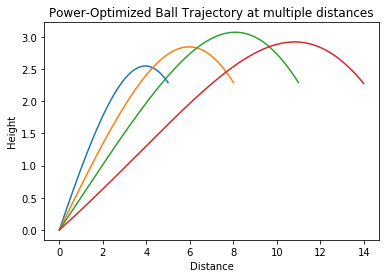

In [61]:
plt.title("Power-Optimized Ball Trajectory at Varying Distances")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")

for i in range(1,5):
    distance = 2 + 3*i
    print(str(i) + " , " + str(distance))
    iterate()
plt.show()

In [ ]:
trial = []
distance = []
omega = []
theta = []

df = pd.DataFrame(data = {'Trial': trial, 'Distance': distance, 'Angular Velocity', 'Angle'})
df.to_csv("")